## Exploratory Data Analysis using Python - A Case Study
Analyzing responses from the Stack Overflow Annual Developer Survey 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
surveyraw_df = pd.read_csv('survey_results_public.csv') 

In [3]:
surveyraw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


#### Let's view the list of columns in the data frame.

In [4]:
surveyraw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

#### We can refer to the schema file to see the full text of each question.

In [5]:
schema = pd.read_csv('survey_results_schema.csv', index_col = 'Column').QuestionText
schema

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [6]:
schema['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

### Data Preparation & Cleaning
Let's select a subset of columns with the relevant data for our analysis.

In [7]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [8]:
survey_df = surveyraw_df[selected_columns].copy()

In [9]:
schema_s = schema[selected_columns]

#### Let's view some basic information about the data frame.

In [10]:
survey_df.shape

(64461, 20)

In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

#### 
Most columns have the data type object. Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though a few other columns have mostly numeric values ( Age1stCode, YearsCode, YearsCodePro)

In [12]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [13]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [14]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

#### 
We can see that there are some strings in numeric columns

#### let's convert these columns into numeric data types while ignoring any non-numeric value.

In [15]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

#### Let's now view some basic statistics about numeric columns.

In [16]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


#### Age column has minimum value 1 and the maximum is 279, which doesnt looks realistic
ignore the rows where the age is higher than 100 years or lower than 10 years

In [17]:
survey_df.drop(survey_df[survey_df['Age'] < 10].index, inplace=True)

In [18]:
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

In [19]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45436.000000,57467.000000,56776.000000,44128.000000,41147.000000
mean,30.834294,15.476273,12.783130,8.870354,40.782153
std,9.506982,5.113997,9.490771,7.760095,17.816102
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,99.000000,85.000000,50.000000,50.000000,475.000000


#### Let's ignore entries where the value for the WorkWeekHrs column is higher than 140 hours. (~20 hours per day).

In [20]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

#### We'll remove values in gender column containing more than one option to simplify our analysis

In [21]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [22]:
# removing multiple gender inputs that has ';'
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [23]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
30797,Nigeria,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,18.0,3.0,NaN,HTML/CSS;PHP;SQL,JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Developer, back-end;System administrator",NaN,NaN,Flex time or a flexible schedule;Office enviro...,NaN,Fairly important
12315,Slovakia,21.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,14.0,5.0,NaN,Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaS...,Bash/Shell/PowerShell;C;C#;HTML/CSS;Java;JavaS...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,NaN
29846,Romania,30.0,Man,Some college/university study without earning ...,NaN,No,15.0,12.0,12.0,Assembly;C#;HTML/CSS;JavaScript;TypeScript,C#;HTML/CSS;TypeScript,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, desktop or ente...",40.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Not at all important/not necessary
20526,United States,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,25.0,10.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, full-stack;D...",50.0,Slightly satisfied,Remote work options;How widely used or impactf...,Sometimes: 1-2 days per month but less than we...,Somewhat important
3255,United States,24.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,20.0,3.0,2.0,Bash/Shell/PowerShell;Python;R;SQL,Bash/Shell/PowerShell;JavaScript;Julia;Python;R,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data or business analyst;Data scientist or mac...,NaN,Slightly dissatisfied,Industry that I’d be working in;Diversity of t...,Occasionally: 1-2 days per quarter but less th...,Fairly important


### Exploratory Data analysis

In [24]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

#### Let's look at Countries column and plot the ten countries with the highest number of responses.

In [25]:
survey_df.Country.nunique()

183

In [26]:
top_countries = survey_df.Country.value_counts().head(10)
top_countries

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
France             1884
Brazil             1804
Netherlands        1332
Poland             1259
Australia          1199
Name: Country, dtype: int64

In [27]:
type(top_countries)

pandas.core.series.Series

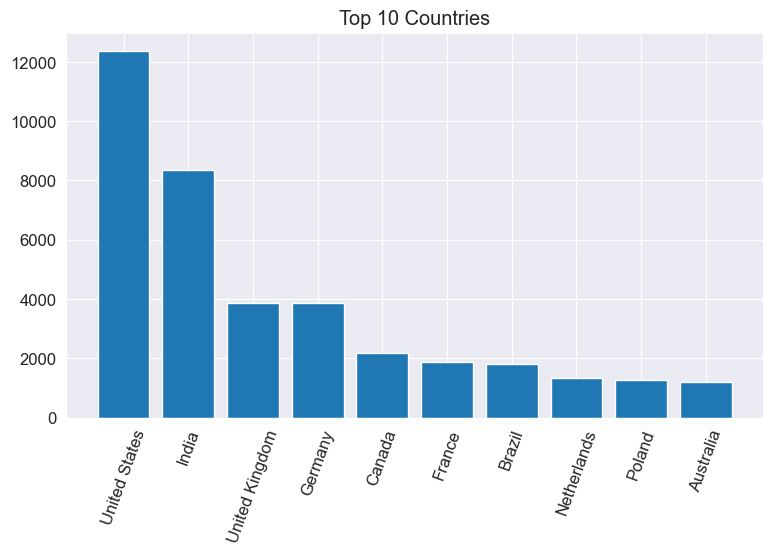

In [28]:
values = top_countries.values;
countries = top_countries.index;
plt.bar(countries, values);
plt.title('Top 10 Countries');
plt.xticks(rotation=70);

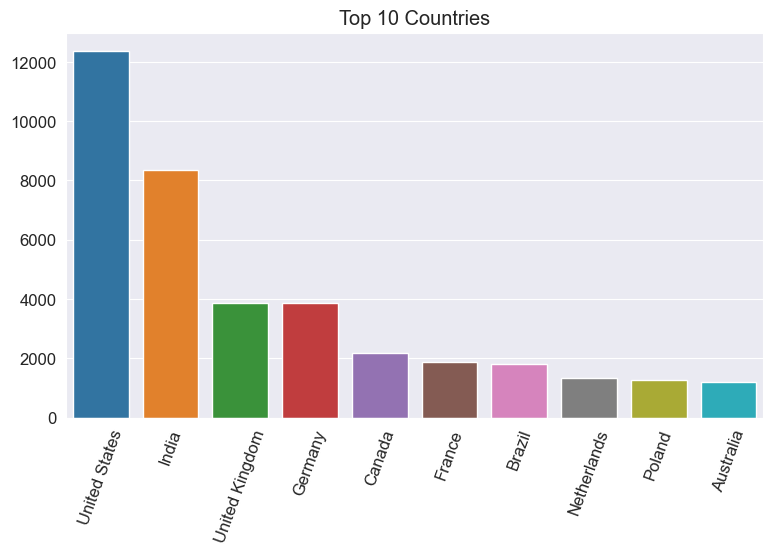

In [29]:
plt.title('Top 10 Countries');
plt.xticks(rotation=70);
sns.barplot(x=countries,y= values);

#### 
Highest respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations.

### Age

#### We can use a histogram to visualize the distribution of respondents' age. 

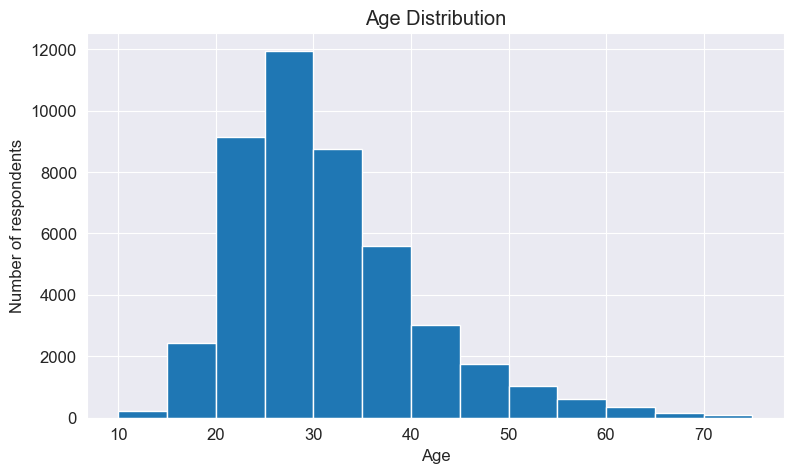

In [30]:
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age,bins=np.arange(10,80,5));

#
It appears that a large percentage of respondents are 20-45 years old.

### Gender

#### Let's look at the distribution of responses for the Gender.

In [31]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

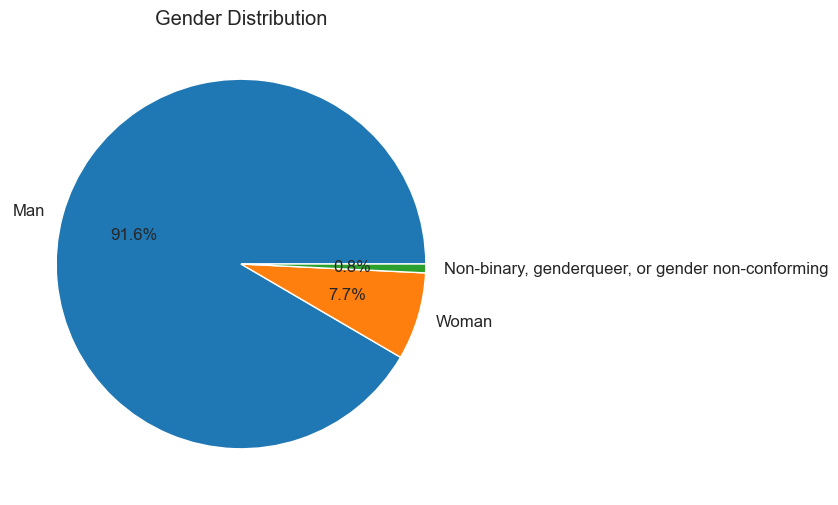

In [32]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels= gender_counts.index, autopct = '%1.1f%%');

#
Only about 8% of survey respondents identify as women or non-binary.

### Education Level

#### Let's compare the education levels of respondents to gain some insight. We'll use a horizontal bar plot here.

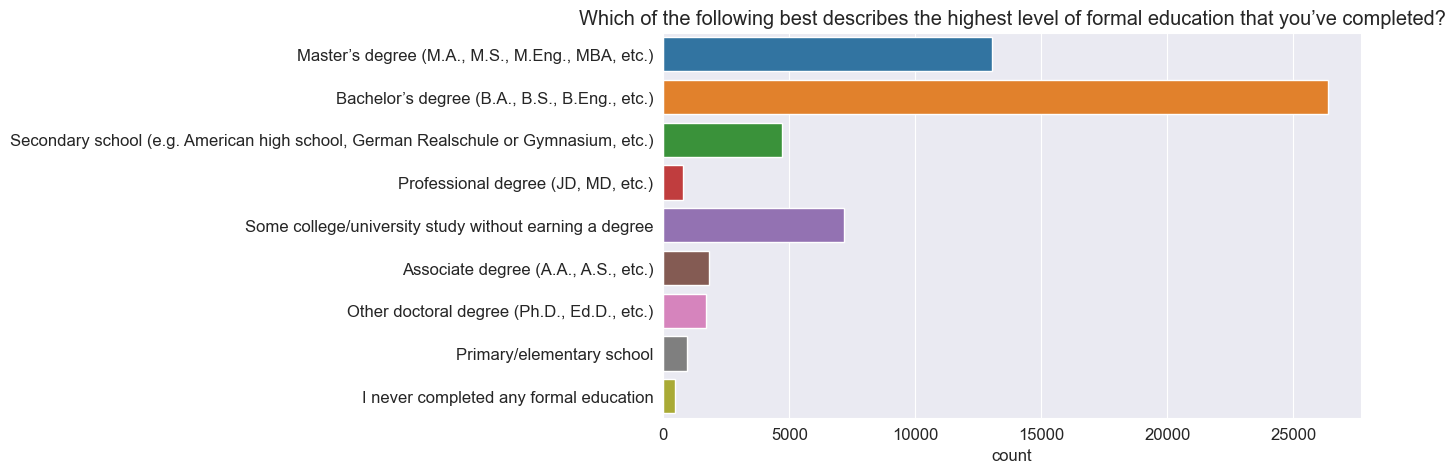

In [33]:
plt.title(schema.EdLevel);
sns.countplot(y=survey_df.EdLevel);
plt.ylabel(None);

#
It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

#### Let's also plot undergraduate majors

In [34]:
schema.UndergradMajor

'What was your primary field of study?'

In [35]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()
undergrad_pct

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

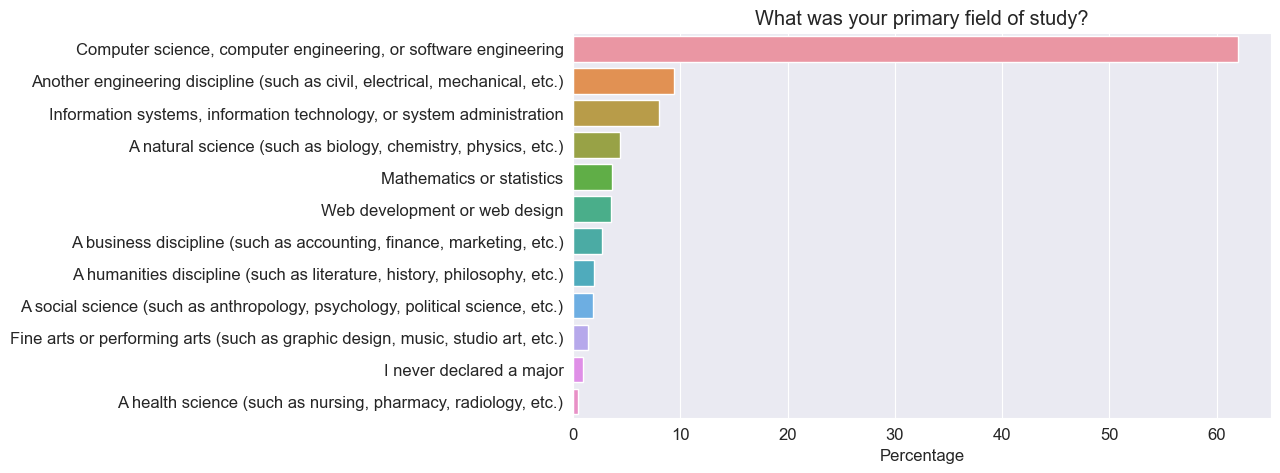

In [36]:
sns.barplot(x=undergrad_pct,y= undergrad_pct.index);

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

#
It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging.

### Employement

#### Let's compare the breakdown between full-time, part-time, and freelance work

In [37]:
survey_df['Employment']

0        Independent contractor, freelancer, or self-em...
1                                       Employed full-time
2                                                      NaN
3                                                      NaN
4                                       Employed full-time
                               ...                        
64456                                   Employed full-time
64457                                   Employed full-time
64458                                                  NaN
64459                                   Employed full-time
64460                                   Employed full-time
Name: Employment, Length: 64306, dtype: object

In [38]:
survey_df.Employment.value_counts()

Employed full-time                                      44958
Student                                                  7734
Independent contractor, freelancer, or self-employed     5619
Not employed, but looking for work                       2324
Employed part-time                                       2200
Not employed, and not looking for work                    318
Retired                                                   241
Name: Employment, dtype: int64

In [39]:
Emp_pct = survey_df.Employment.value_counts() * 100 / survey_df.Employment.count()
Emp_pct

Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: Employment, dtype: float64

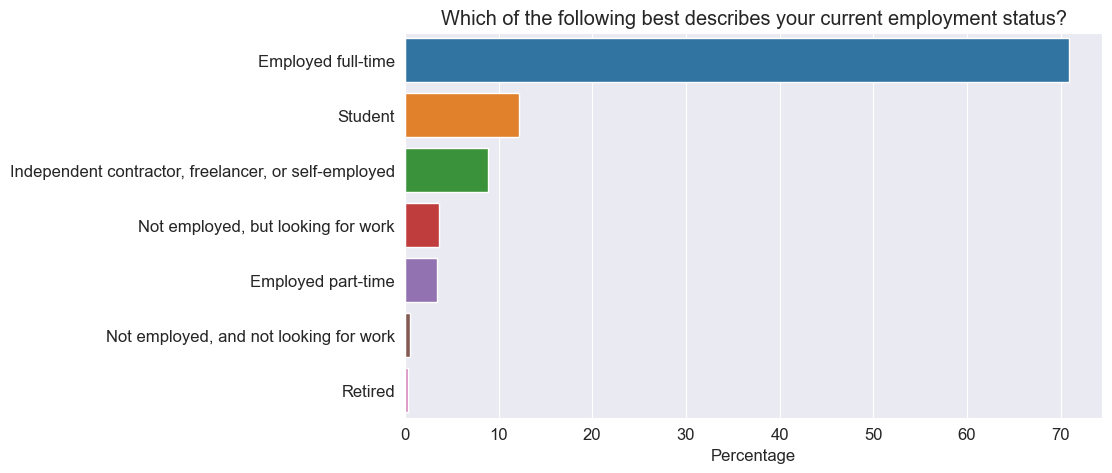

In [40]:
sns.barplot(x = Emp_pct, y = Emp_pct.index);
plt.xlabel('Percentage');
plt.title(schema.Employment);

#
It appears that close to 10% of respondents are employed part time or as freelancers.

### Developer Type

#### Let's analyze the information about the developer roles held by respondents.

In [41]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [42]:
survey_df.DevType

0        Developer, desktop or enterprise applications;...
1                  Developer, full-stack;Developer, mobile
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
64456                                  Senior executive/VP
64457                                                  NaN
64458                                                  NaN
64459                                                  NaN
64460                                                  NaN
Name: DevType, Length: 64306, dtype: object

In [43]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

####
Since the question has multiple answers, the column has values separated by a semi-colon ';' making it a bit harder to analyze directly. 

#### Let's define a function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.


In [44]:
def split_multicolumn(col_series):
    # creates a new DataFrame result_df from the col_series series
    result_df = col_series.to_frame()
    
    #initializes an empty list options to keep track of unique options found in col_series.
    options = []
    
    #This line iterates over each non-null value in col_series.
    for idx, value in col_series[col_series.notnull()].iteritems():
    
    #This line further iterates over each option in the value by splitting it using the semicolon (;)    
        for option in value.split(';'):
            
    #This line checks if the current option is not already a column in the result_df DataFrame.
            if not option in result_df.columns:
    
    #This line appends the current option to the options list, as it is a new option that needs to be tracked.
                options.append(option)
    
    #This line adds a new column with the name of the current option to the result_df DataFrame, 
    #and sets all the values in that column to False.
                result_df[option]=False
    
    #This line sets the value of the current option in the row corresponding to the current index idx 
    #in the result_df DataFrame to True, indicating that this option is present for that particular row.
            result_df.at[idx, option] = True
    
    #This line returns a new DataFrame containing only the columns that represent the unique options 
    #found in the col_series column, with True or False
    return result_df[options]

In [45]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_13256\1411061643.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in col_series[col_series.notnull()].iteritems():


,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
dev_type_total = dev_type_df.sum().sort_values(ascending = False)
dev_type_total

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

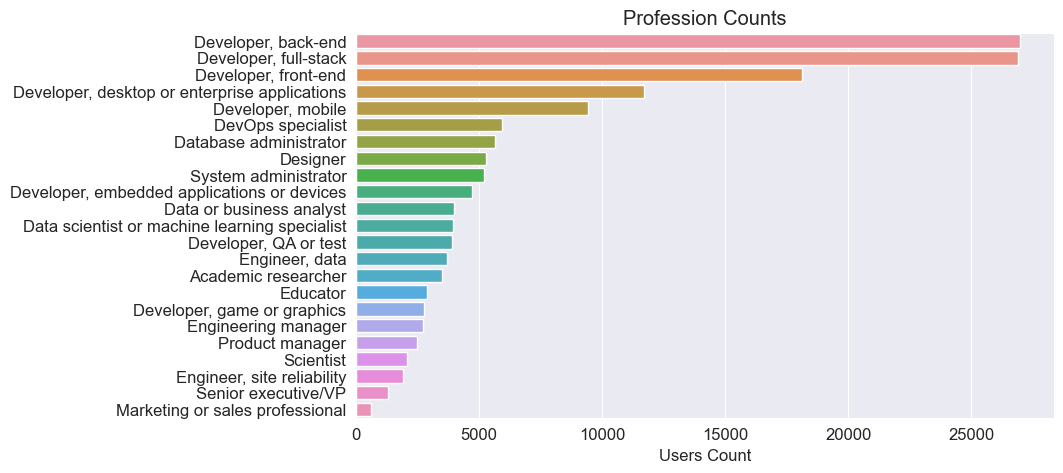

In [47]:
plt.title('Profession Counts');
plt.xlabel('Users Count');
sns.barplot(x = dev_type_total, y = dev_type_total.index);

#
As one might expect, the most common roles include "Developer" in the name.

## Questions

### 1. Which were the most popular programming languages?

In [48]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [49]:
lang_df = split_multicolumn(survey_df.LanguageWorkedWith)
lang_df

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_13256\1411061643.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in col_series[col_series.notnull()].iteritems():


,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
lang_total = lang_df.sum().sort_values(ascending = False)
lang_total

JavaScript               38515
HTML/CSS                 35884
SQL                      31153
Python                   25080
Java                     22905
Bash/Shell/PowerShell    18803
C#                       17879
PHP                      14874
TypeScript               14444
C++                      13578
C                        12370
Go                        4989
Kotlin                    4429
Ruby                      4006
Assembly                  3503
VBA                       3469
Swift                     3361
R                         3257
Rust                      2893
Objective-C               2317
Dart                      2262
Scala                     2026
Perl                      1773
Haskell                   1197
Julia                      503
dtype: int64

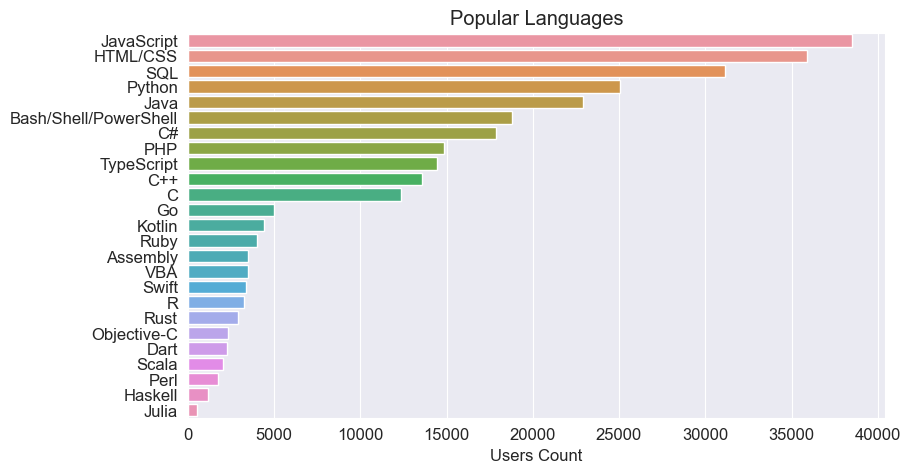

In [51]:
plt.title('Popular Languages');
plt.xlabel('Users Count');
sns.barplot(x = lang_total, y = lang_total.index);

## 2. Which languages are the most people interested to learn in coming years?

In [52]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_13256\1411061643.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, value in col_series[col_series.notnull()].iteritems():


In [53]:
languages_total = languages_interested_df.sum().sort_values(ascending = False)
languages_total

Python                   26458
JavaScript               25996
HTML/CSS                 20596
SQL                      19806
TypeScript               17010
C#                       13542
Java                     13160
Go                       12496
Bash/Shell/PowerShell    11612
Rust                     10463
C++                       9655
Kotlin                    9492
PHP                       7040
C                         6019
Swift                     5590
Dart                      4700
R                         4226
Ruby                      4132
Scala                     3425
Haskell                   2954
Assembly                  2422
Julia                     1634
Objective-C               1504
Perl                      1133
VBA                       1036
dtype: int64

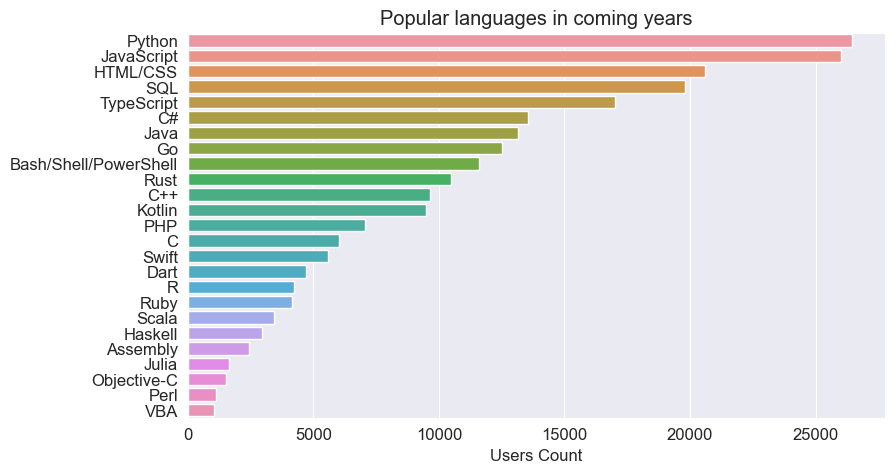

In [54]:
plt.title('Popular languages in coming years');
plt.xlabel('Users Count');
sns.barplot(x = languages_total, y = languages_total.index);

## 3. How important is it to start young to build a career in programming?

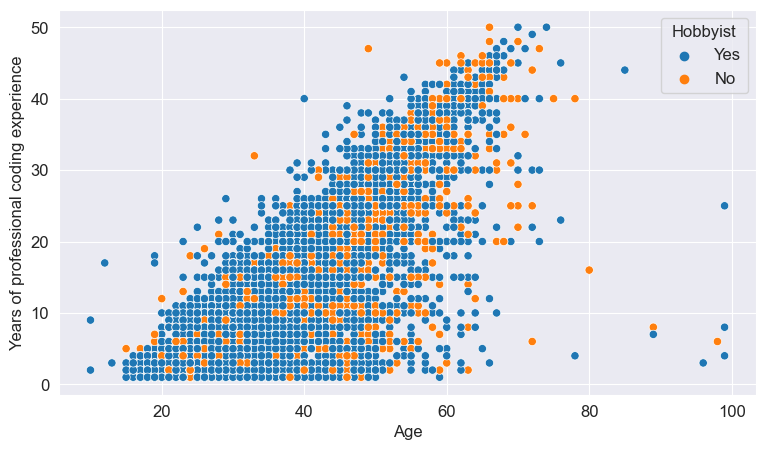

In [55]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

#### The graph indicates that you can start programming professionally at any age.